## Q1: PCA Histogram

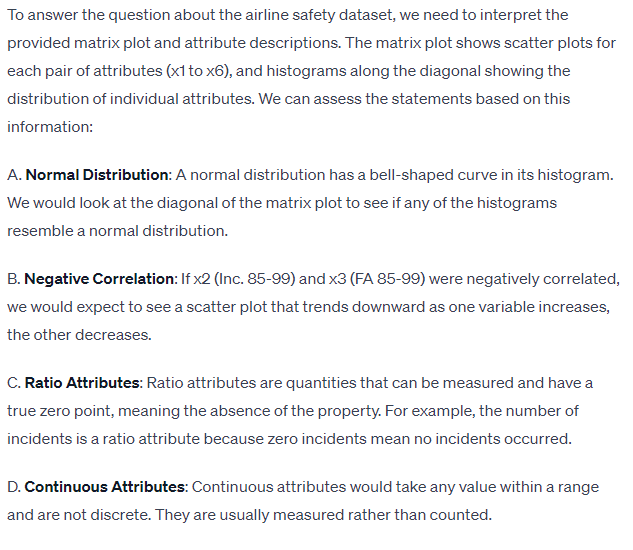

Q2: Same as Q1 Fall 2021

## Q3: standardized observation co-ordinate for first 2 PCA

In [2]:
import numpy as np

V = np.array([
    [0.38, -0.51, 0.23, 0.47, -0.55, 0.11],
    [0.41, 0.41, -0.53, 0.24, 0.00, 0.58],
    [0.50, 0.34, -0.13, 0.15, -0.05, -0.77],
    [0.29, 0.48, 0.78, -0.17, 0.00, 0.23],
    [0.45, -0.42, 0.09, 0.03, 0.78, 0.04],
    [0.39, -0.23, -0.20, -0.82, -0.30, 0.04]
])

# Standardized observation
x_tilde = np.array([-0.1, 0.2, 0.1, -0.3, 1, 0.5])

# Matrix V containing PCA directions for the first two principal components
V_first_2_PCA = np.array([
    [0.38, -0.51],
    [0.41,  0.41],
    [0.50,  0.34],
    [0.29,  0.48],
    [0.45, -0.42],
    [0.39, -0.23]
])

# Projecting the standardized observation onto the first two principal components
projected_coordinate = x_tilde.dot(V_first_2_PCA)
projected_coordinate


array([ 0.652, -0.512])

## Q4: GMM basics

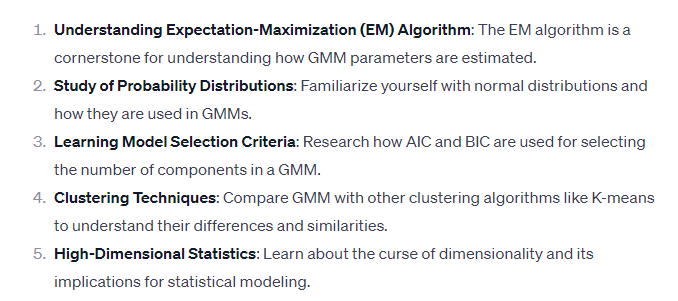
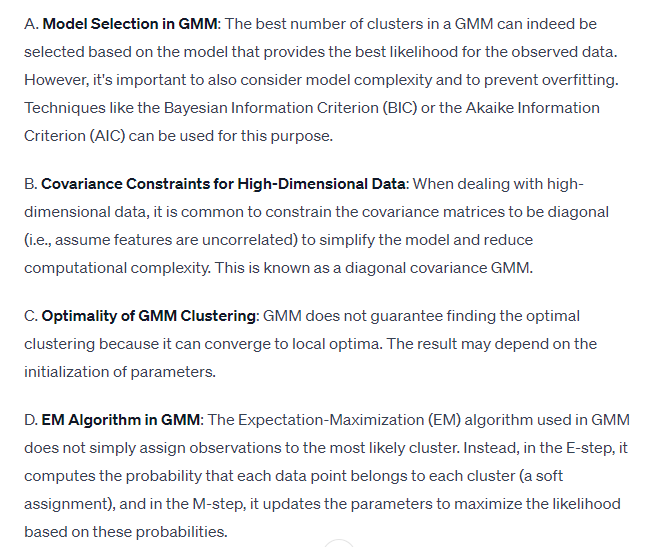

## Q5 : Fitted density estimation from GMM density (graph)

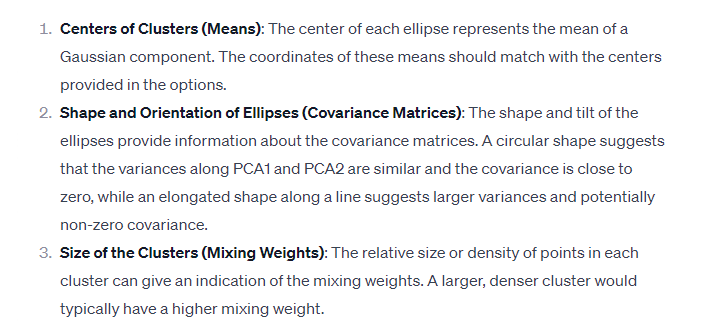
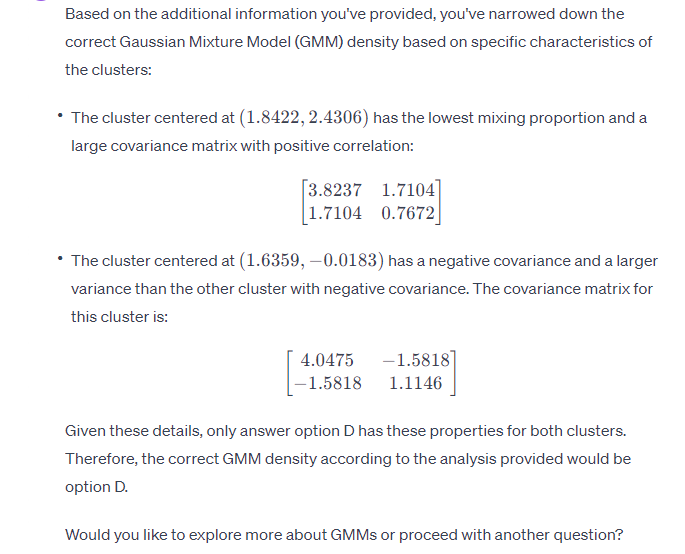

## Q6: RMSE Perfromance selection

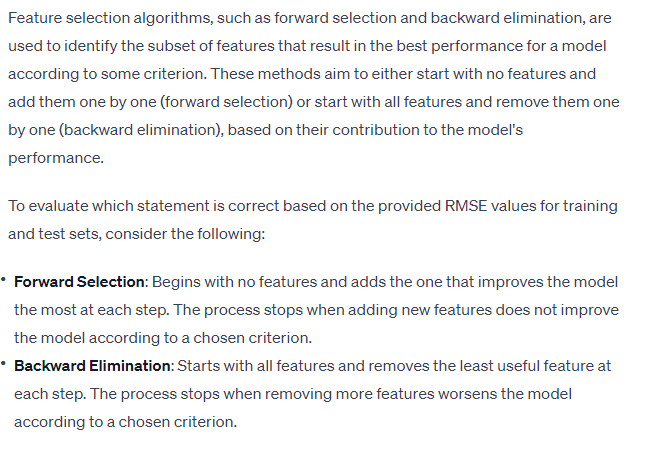
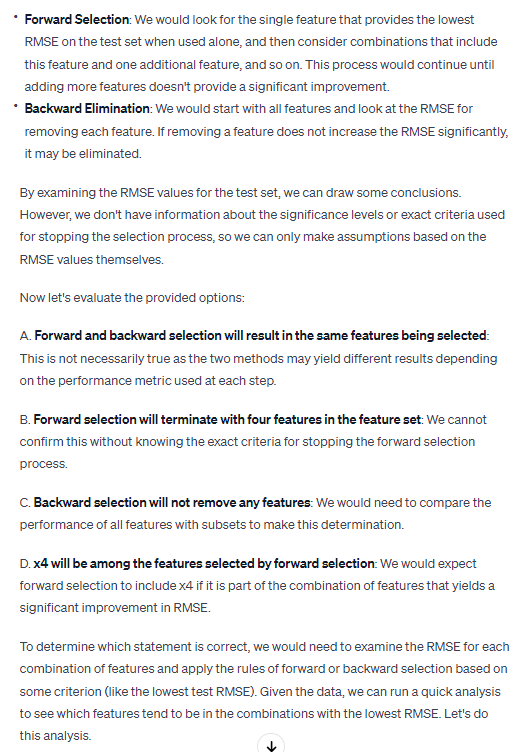

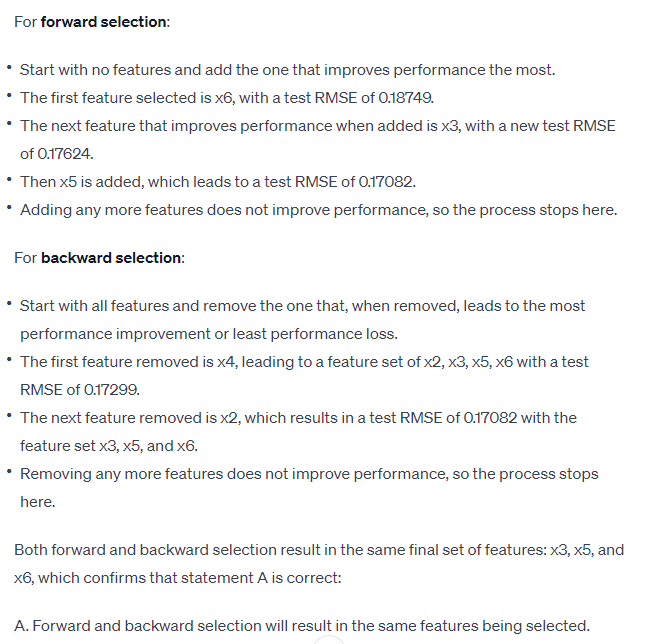

# Q7

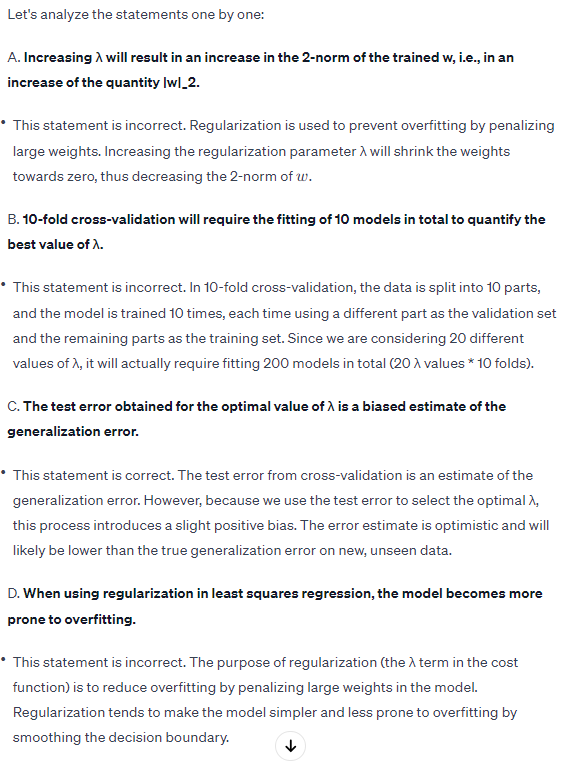

## Q8: ANN - Network Model

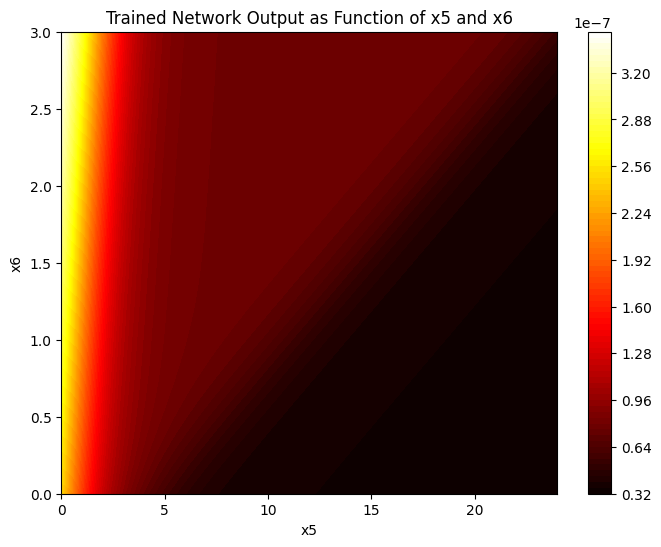

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Given weights for the neural network
w1_1 = np.array([0.0189, 0.9159, -0.4256])
w1_2 = np.array([3.7336, -0.8003, 5.0741])
w2_0 = 0.3799 * 10**-6
w2_1 = -0.3440 * 10**-6
w2_2 = 0.0429 * 10**-6

# Function to compute the output of the ANN based on the weights and inputs
def neural_network_output(x5, x6):
    # Input layer to hidden layer
    z1 = logistic(w1_1[0] + w1_1[1]*x5 + w1_1[2]*x6)
    z2 = logistic(w1_2[0] + w1_2[1]*x5 + w1_2[2]*x6)
    
    # Hidden layer to output layer
    output = w2_0 + (w2_1 * z1) + (w2_2 * z2)
    return output

# Generate a grid of x5 and x6 values
x5_values = np.linspace(0, 24, 100)
x6_values = np.linspace(0, 3, 100)
x5_grid, x6_grid = np.meshgrid(x5_values, x6_values)

# Compute the network output for each combination of x5 and x6
output_grid = np.zeros_like(x5_grid)
for i in range(x5_grid.shape[0]):
    for j in range(x5_grid.shape[1]):
        output_grid[i, j] = neural_network_output(x5_grid[i, j], x6_grid[i, j])

# Plot the output grid as a heatmap
plt.figure(figsize=(8, 6))
plt.contourf(x5_grid, x6_grid, output_grid, levels=100, cmap='hot')
plt.colorbar()
plt.title('Trained Network Output as Function of x5 and x6')
plt.xlabel('x5')
plt.ylabel('x6')
plt.show()


In [5]:
# Define the logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Given weights for the ANN
w1_1 = np.array([0.0189, 0.9159, -0.4256])
w1_2 = np.array([3.7336, -0.8003, 5.0741])
w2_0 = 0.3799 * 10**-6
w2_1 = -0.3440 * 10**-6
w2_2 = 0.0429 * 10**-6

# Calculate the network output for x5 = 0, x6 = 3
input_1 = np.array([1, 0, 3])
output_1 = w2_0 + w2_1 * logistic(np.dot(w1_1, input_1)) + w2_2 * logistic(np.dot(w1_2, input_1))

# Calculate the network output for x5 = 24, x6 = 0
input_2 = np.array([1, 24, 0])
output_2 = w2_0 + w2_1 * logistic(np.dot(w1_1, input_2)) + w2_2 * logistic(np.dot(w1_2, input_2))

output_1, output_2


(3.4666055082334386e-07, 3.590000826846974e-08)

## Q9: Largest value of hidden units
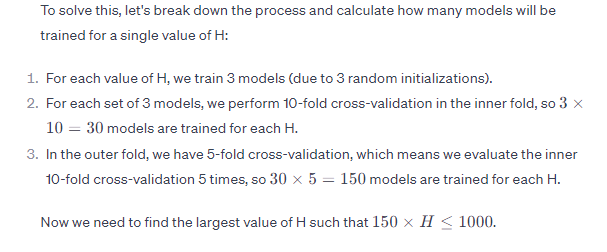

In [6]:
# Given parameters
models_per_initialization = 3  # models for each specification of the number of hidden units
inner_fold_cv = 10  # 10-fold cross-validation in the inner fold
outer_fold_cv = 5   # 5-fold cross-validation in the outer fold

# Total models trained for one value of H
models_per_H = models_per_initialization * inner_fold_cv * outer_fold_cv

# Compute the largest value of H where the total number of trained models does not exceed 1000
max_models = 1000
largest_H = max_models // models_per_H

largest_H


6

# Q10: Bayes Theorem - Example
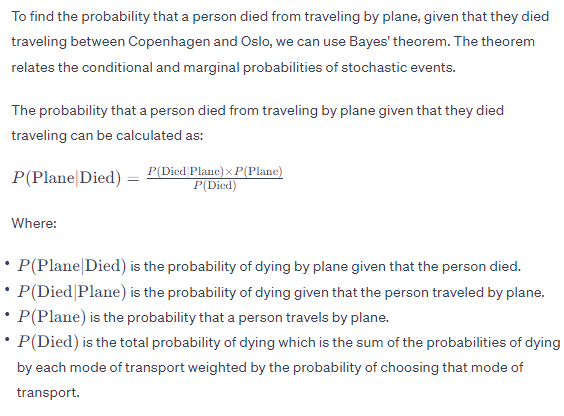

In [7]:
# Given probabilities
prob_dying_car = 0.000271 / 100  # converting percentage to decimal
prob_dying_bus = 0.000004 / 100
prob_dying_plane = 0.000003 / 100

# Given mode of transport choices
prob_choosing_car = 30 / 100
prob_choosing_bus = 10 / 100
prob_choosing_plane = 60 / 100

# Total probability of dying
prob_dying_total = (prob_dying_car * prob_choosing_car +
                    prob_dying_bus * prob_choosing_bus +
                    prob_dying_plane * prob_choosing_plane)

# Probability of dying from traveling by plane given that the person died
prob_plane_given_died = (prob_dying_plane * prob_choosing_plane) / prob_dying_total

prob_plane_given_died_percentage = prob_plane_given_died * 100  # converting back to percentage
prob_plane_given_died_percentage


2.1556886227544916

## Q11: Purity Gain Calculation
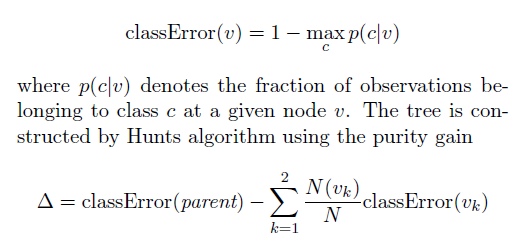

In [8]:
# Before the split, we calculate the classification error for the root node.
total_companies = 32 + 24  # total number of companies
max_class_root = max(32, 24) / total_companies  # max proportion of one class at the root
classification_error_root = 1 - max_class_root  # classification error at the root

# After the split, we calculate the classification error for each child node.
# First child node (few incidences)
safe_few_incidents = 23
unsafe_few_incidents = 8
total_few_incidents = safe_few_incidents + unsafe_few_incidents
max_class_few = max(safe_few_incidents, unsafe_few_incidents) / total_few_incidents
classification_error_few = 1 - max_class_few

# Second child node (many incidences)
safe_many_incidents = 9
unsafe_many_incidents = 16
total_many_incidents = safe_many_incidents + unsafe_many_incidents
max_class_many = max(safe_many_incidents, unsafe_many_incidents) / total_many_incidents
classification_error_many = 1 - max_class_many

# Weighted average of classification error after the split
weighted_avg_error_after = (
    (total_few_incidents * classification_error_few) +
    (total_many_incidents * classification_error_many)
) / total_companies

# Purity gain of the split
purity_gain = classification_error_root - weighted_avg_error_after
purity_gain


0.12500000000000006

##Q13:  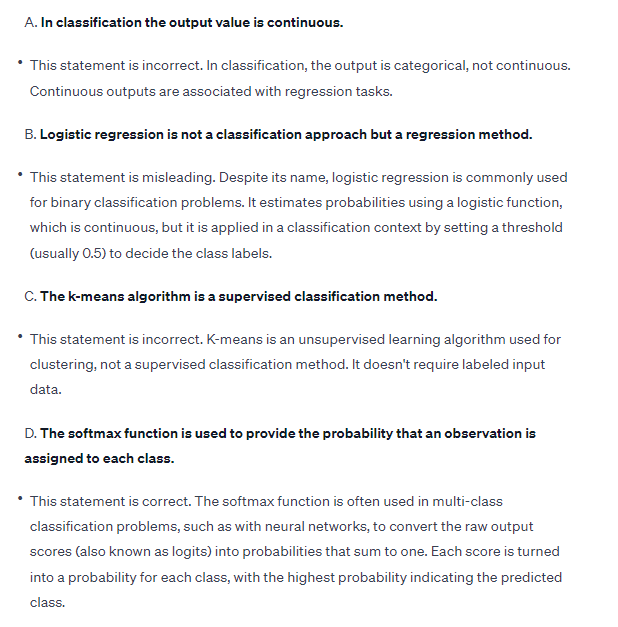

## Confusion Matrix and calculations
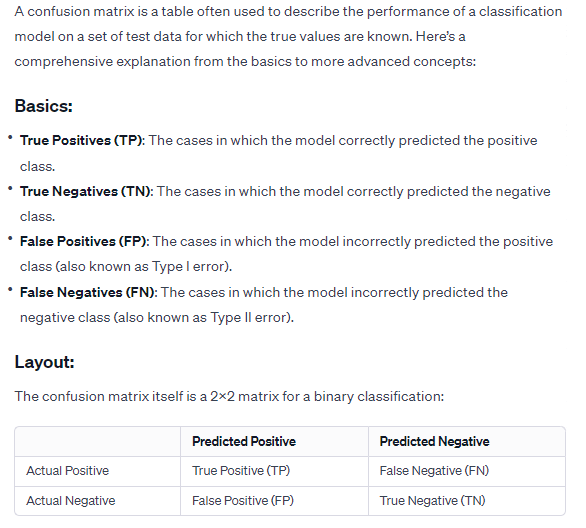
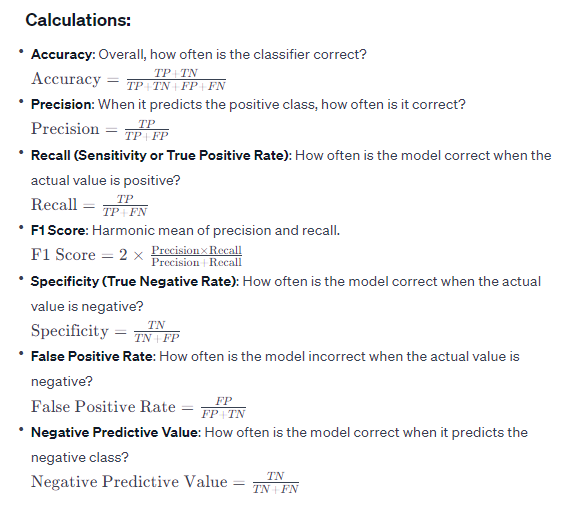
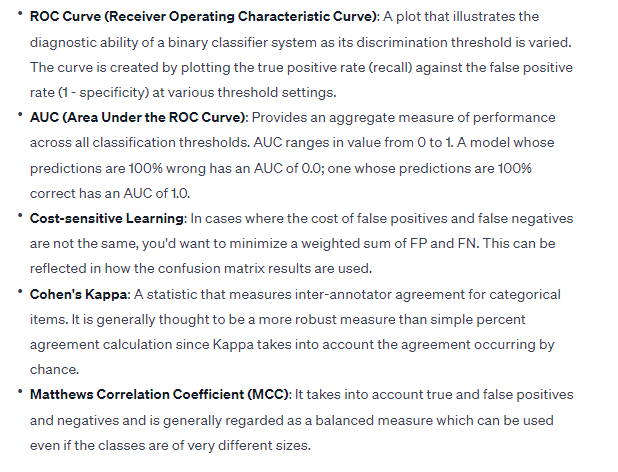
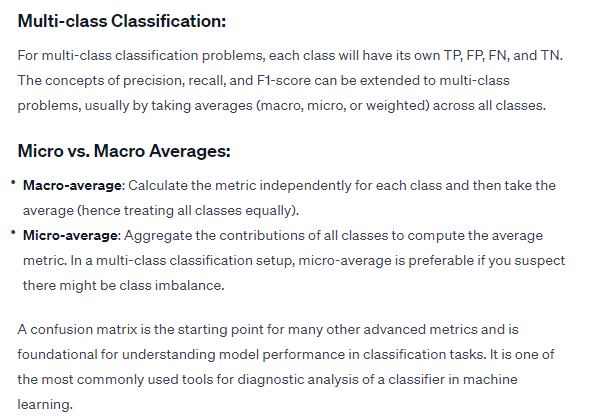

In [10]:
import numpy as np

# Distance matrix for the 10 observations
distances = np.array([
    [0, 8.55, 0.43, 1.25, 1.14, 3.73, 2.72, 1.63, 1.68, 1.28],
    [8.55, 0, 8.23, 8.13, 8.49, 6.84, 8.23, 8.28, 8.13, 7.66],
    [0.43, 8.23, 0, 1.09, 1.10, 3.55, 2.68, 1.50, 1.52, 1.05],
    [1.25, 8.13, 1.09, 0, 1.23, 3.21, 2.17, 1.29, 1.33, 0.56],
    [1.14, 8.49, 1.10, 1.23, 0, 3.20, 2.68, 1.56, 1.50, 1.28],
    [3.73, 6.84, 3.55, 3.21, 3.20, 0, 2.98, 2.66, 2.50, 3.00],
    [2.72, 8.23, 2.68, 2.17, 2.68, 2.98, 0, 2.28, 2.30, 2.31],
    [1.63, 8.28, 1.50, 1.29, 1.56, 2.66, 2.28, 0, 0.25, 1.46],
    [1.68, 8.13, 1.52, 1.33, 1.50, 2.50, 2.30, 0.25, 0, 1.44],
    [1.28, 7.66, 1.05, 0.56, 1.28, 3.00, 2.31, 1.46, 1.44, 0]
])

# Class labels for the observations
# Assuming C1 = poor rating, C2 = average rating, C3 = high rating
class_labels = np.array(['C1', 'C2', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C1'])

# Leave-One-Out Cross Validation for KNN
k = 1
errors = 0

# Iterate over each observation
for i in range(len(distances)):
    # Create a mask to exclude the current observation
    mask = np.ones(len(distances), dtype=bool)
    mask[i] = False

    # Get the distances and labels for the remaining observations
    distances_without_i = distances[i, mask]
    labels_without_i = class_labels[mask]

    # Find the indices of the k-nearest neighbors (excluding the current observation)
    neighbor_indices = np.argsort(distances_without_i)[:k]
    
    # Get the classes of the k-nearest neighbors
    neighbor_classes = labels_without_i[neighbor_indices]
    
    # Determine the most common class among the neighbors
    unique, counts = np.unique(neighbor_classes, return_counts=True)
    neighbor_class_counts = dict(zip(unique, counts))
    
    # Tie-breaking rule: choose the class of the closest neighbor among the tied classes
    if len(unique[counts == counts.max()]) > 1:  # There's a tie
        # Sort neighbors by distance and take the class of the closest one
        sorted_neighbors_by_distance = labels_without_i[np.argsort(distances_without_i)]
        for label in sorted_neighbors_by_distance:
            if label in unique[counts == counts.max()]:
                predicted_class = label
                break
    else:
        # No tie, take the most common class
        predicted_class = unique[counts.argmax()]
    
    # Increment the error count if the prediction is wrong
    if predicted_class != class_labels[i]:
        errors += 1

# Calculate the error rate
error_rate = errors / len(distances)

error_rate


0.1

## Dendogram: Average Linkage

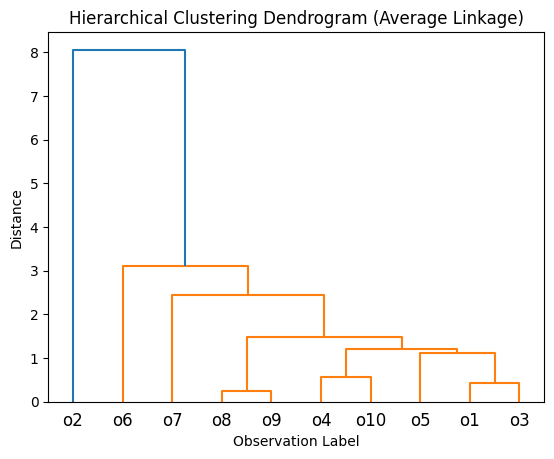

In [3]:
import numpy as np
from scipy.cluster.hierarchy import complete, dendrogram, average
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Define the distance matrix
distance_matrix = np.array([
    [0, 8.55, 0.43, 1.25, 1.14, 3.73, 2.72, 1.63, 1.68, 1.28],
    [8.55, 0, 8.23, 8.13, 8.49, 6.84, 8.23, 8.28, 8.13, 7.66],
    [0.43, 8.23, 0, 1.09, 1.10, 3.55, 2.68, 1.50, 1.52, 1.05],
    [1.25, 8.13, 1.09, 0, 1.23, 3.21, 2.17, 1.29, 1.33, 0.56],
    [1.14, 8.49, 1.10, 1.23, 0, 3.20, 2.68, 1.56, 1.50, 1.28],
    [3.73, 6.84, 3.55, 3.21, 3.20, 0, 2.98, 2.66, 2.50, 3.00],
    [2.72, 8.23, 2.68, 2.17, 2.68, 2.98, 0, 2.28, 2.30, 2.31],
    [1.63, 8.28, 1.50, 1.29, 1.56, 2.66, 2.28, 0, 0.25, 1.46],
    [1.68, 8.13, 1.52, 1.33, 1.50, 2.50, 2.30, 0.25, 0, 1.44],
    [1.28, 7.66, 1.05, 0.56, 1.28, 3.00, 2.31, 1.46, 1.44, 0]
])


# Condense the distance matrix to the format required by the average linkage function
condensed_dist_matrix = squareform(distance_matrix, checks=False)

# Perform average linkage hierarchical clustering
linked = average(condensed_dist_matrix)

# Plot the dendrogram
dendrogram(linked,
           labels=['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10'],
           leaf_rotation=0)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Observation Label')
plt.ylabel('Distance')
plt.show()

## Q17: Find Dendogram Cluster - based on cutoff
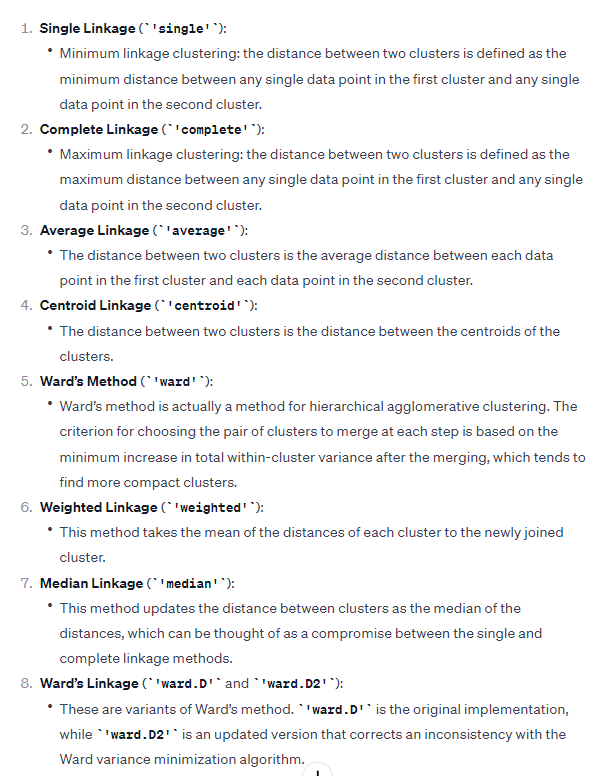

In [ ]:
# Let's assume you have already performed hierarchical clustering and have a linkage matrix `Z`.
# Here is a sample code using scipy to cut the dendrogram and create cluster labels.

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Example data - replace this with your actual data
X = np.array([[1, 2], [2, 3], [3, 2], [4, 4], [5, 6], [6, 5], [7, 8], [8, 7], [9, 9], [10, 10]])

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Cut the dendrogram at the height that will result in 3 clusters
# 't' is the threshold to apply when forming flat clusters
cluster_labels = fcluster(Z, t=3, criterion='maxclust')

# Print out the resulting cluster labels
cluster_labels


## Rand Index - based on Dendogram Clusters

In [24]:
# Given data
true_labels_vector = [1, 2, 1, 1, 1, 2, 2, 2, 2, 1]
cluster_indices_vector = [1, 2, 1, 1, 1, 3, 1, 1, 1, 1]

# Number of observations
N = len(true_labels_vector)

# Calculate total pairs (K)
K = N * (N - 1) // 2

# Initialize true positive (f11) and true negative (f00) counts
f11 = 0
f00 = 0

# Create a dictionary to hold the counts of elements in each cluster and class
cluster_counts = {1: {'safe': 0, 'unsafe': 0}, 
                  2: {'safe': 0, 'unsafe': 0}, 
                  3: {'safe': 0, 'unsafe': 0}}

# Count the number of safe/unsafe airlines in each cluster
for label, cluster in zip(true_labels_vector, cluster_indices_vector):
    if label == 1:
        cluster_counts[cluster]['safe'] += 1
    else:
        cluster_counts[cluster]['unsafe'] += 1

# Calculate f11 (within-group pairs)
for cluster in cluster_counts:
    n_safe = cluster_counts[cluster]['safe']
    n_unsafe = cluster_counts[cluster]['unsafe']
    f11 += (n_safe * (n_safe - 1) // 2) + (n_unsafe * (n_unsafe - 1) // 2)

# Calculate f00 (between-group pairs)
# f00 is the number of pairs where observations are in different classes and different clusters
# This involves checking every pair of observations
for i in range(N):
    for j in range(i + 1, N):
        # Check if they belong to different classes and different clusters
        if true_labels_vector[i] != true_labels_vector[j] and cluster_indices_vector[i] != cluster_indices_vector[j]:
            f00 += 1


# Calculate the Rand Index (R)
R = (f11 + f00) / K
R, f11, f00


(0.5111111111111111, 13, 10)

## Q18: Average Relative Density

In [26]:
import numpy as np

# Distance matrix for the 10 observations
distance_matrix = np.array([
    [0, 8.55, 0.43, 1.25, 1.14, 3.73, 2.72, 1.63, 1.68, 1.28],
    [8.55, 0, 8.23, 8.13, 8.49, 6.84, 8.23, 8.28, 8.13, 7.66],
    [0.43, 8.23, 0, 1.09, 1.10, 3.55, 2.68, 1.50, 1.52, 1.05],
    [1.25, 8.13, 1.09, 0, 1.23, 3.21, 2.17, 1.29, 1.33, 0.56],
    [1.14, 8.49, 1.10, 1.23, 0, 3.20, 2.68, 1.56, 1.50, 1.28],
    [3.73, 6.84, 3.55, 3.21, 3.20, 0, 2.98, 2.66, 2.50, 3.00],
    [2.72, 8.23, 2.68, 2.17, 2.68, 2.98, 0, 2.28, 2.30, 2.31],
    [1.63, 8.28, 1.50, 1.29, 1.56, 2.66, 2.28, 0, 0.25, 1.46],
    [1.68, 8.13, 1.52, 1.33, 1.50, 2.50, 2.30, 0.25, 0, 1.44],
    [1.28, 7.66, 1.05, 0.56, 1.28, 3.00, 2.31, 1.46, 1.44, 0]
])

# Index for observation o7
index_o7 = 1
# Number of nearest neighbors
K = 2

# Exclude o7 from the neighbors
neighbors_o7 = np.argsort(distance_matrix[index_o7])[1:K+1]

# Calculate KNN density for o7
knn_density_o7 = 1 / (1/K * np.sum(distance_matrix[index_o7][neighbors_o7]))

# Calculate KNN density for each neighbor
knn_density_neighbors = [
    1 / (1/K * np.sum(np.sort(distance_matrix[n])[1:K+1]))
    for n in neighbors_o7
]

# Average KNN density for the neighbors
avg_knn_density_neighbors = np.mean(knn_density_neighbors)

# Compute ARD for o7
ard_o7 = knn_density_o7 / avg_knn_density_neighbors

ard_o7


0.16925788213721796

## Pairwise Euclidian Matrix --> Binarized Matrix

In [ ]:
# Given distance matrix as a numpy array (as provided earlier)
distance_matrix = np.array([
    [0, 8.55, 0.43, 1.25, 1.14, 3.73, 2.72, 1.63, 1.68, 1.28],
    [8.55, 0, 8.23, 8.13, 8.49, 6.84, 8.23, 8.28, 8.13, 7.66],
    [0.43, 8.23, 0, 1.09, 1.10, 3.55, 2.68, 1.50, 1.52, 1.05],
    [1.25, 8.13, 1.09, 0, 1.23, 3.21, 2.17, 1.29, 1.33, 0.56],
    [1.14, 8.49, 1.10, 1.23, 0, 3.20, 2.68, 1.56, 1.50, 1.28],
    [3.73, 6.84, 3.55, 3.21, 3.20, 0, 2.98, 2.66, 2.50, 3.00],
    [2.72, 8.23, 2.68, 2.17, 2.68, 2.98, 0, 2.28, 2.30, 2.31],
    [1.63, 8.28, 1.50, 1.29, 1.56, 2.66, 2.28, 0, 0.25, 1.46],
    [1.68, 8.13, 1.52, 1.33, 1.50, 2.50, 2.30, 0.25, 0, 1.44],
    [1.28, 7.66, 1.05, 0.56, 1.28, 3.00, 2.31, 1.46, 1.44, 0]
])

# Replace diagonal with NaN to ignore self-distances in median calculation
np.fill_diagonal(distance_matrix, np.nan)

# Calculate the median distance excluding the diagonal (self-distances)
median_distance = np.nanmedian(distance_matrix)

# Binarize the matrix based on the median distance
# 1 if the distance is greater than the median, 0 otherwise
binarized_matrix = (distance_matrix > median_distance).astype(int)

# Replace the diagonal back to 0 after binarization
np.fill_diagonal(binarized_matrix, 0)

binarized_matrix

## Feature Matrix --> Binarized Matrix

In [28]:
import numpy as np

# Assuming a general feature matrix with 8 features and 10 observations
# For demonstration, I will create a random feature matrix.
# In practice, you would replace this with your actual data.
# np.random.seed(0)  # For reproducibility

feature_matrix = np.array([
    [0, 8.55, 0.43, 1.25, 1.14, 3.73, 2.72, 1.63, 1.68, 1.28],
    [8.55, 0, 8.23, 8.13, 8.49, 6.84, 8.23, 8.28, 8.13, 7.66],
    [0.43, 8.23, 0, 1.09, 1.10, 3.55, 2.68, 1.50, 1.52, 1.05],
    [1.25, 8.13, 1.09, 0, 1.23, 3.21, 2.17, 1.29, 1.33, 0.56],
    [1.14, 8.49, 1.10, 1.23, 0, 3.20, 2.68, 1.56, 1.50, 1.28],
    [3.73, 6.84, 3.55, 3.21, 3.20, 0, 2.98, 2.66, 2.50, 3.00],
    [2.72, 8.23, 2.68, 2.17, 2.68, 2.98, 0, 2.28, 2.30, 2.31],
    [1.63, 8.28, 1.50, 1.29, 1.56, 2.66, 2.28, 0, 0.25, 1.46],
    [1.68, 8.13, 1.52, 1.33, 1.50, 2.50, 2.30, 0.25, 0, 1.44],
    [1.28, 7.66, 1.05, 0.56, 1.28, 3.00, 2.31, 1.46, 1.44, 0]
])  # 10 observations, 8 features

# Calculate the median value for each feature
medians = np.median(feature_matrix, axis=0)

# Binarize the matrix based on the median value for each feature
# 1 if the feature value is greater than the median, 0 otherwise
binarized_matrix = (feature_matrix > medians).astype(int)

binarized_matrix

array([[0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Support for Association Rule - Calculation
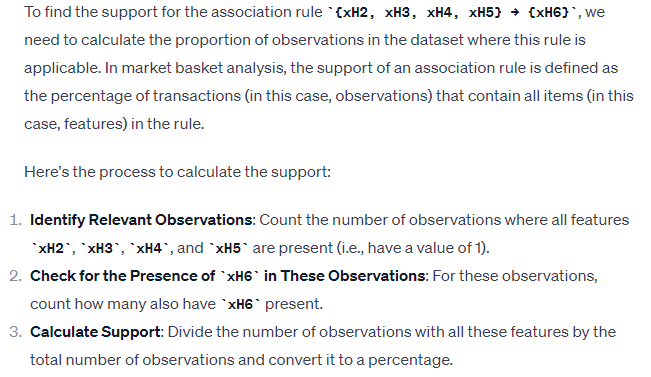

In [31]:
# Given binarized data for features xH2, xH3, xH4, xH5, and xH6
# Columns: [xL1, xH1, xL2, xH2, xL3, xH3, xL4, xH4, xL5, xH5, xL6, xH6]
binarized_data = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
])

# Columns for xH2, xH3, xH4, xH5, xH6 are at indices 3, 5, 7, 9, 11 respectively
indices_rule = [3, 5, 7, 9]  # Indices for xH2, xH3, xH4, xH5
index_consequence = 11  # Index for xH6

# Count observations where xH2, xH3, xH4, xH5 are all present (1) and xH6 is also present (1)
count_support = np.sum(np.all(binarized_data[:, indices_rule] == 1, axis=1) & (binarized_data[:, index_consequence] == 1))

# Total number of observations
total_observations = len(binarized_data)

# Calculate support as a percentage
support_percentage = (count_support / total_observations) * 100
support_percentage


20.0

## Q19 : Confidence Value
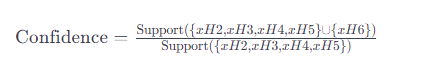

In [34]:
# Data from the user
transactions = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
])

# Count the support for the antecedent (f6 and f8)
support_antecedent = sum(1 for transaction in transactions if transaction[3] == 1 and transaction[5] == 1 and transaction[7] == 1 and transaction[9] == 1)

# Count the support for the entire rule (f6, f8, f3, and f5)
support_whole_rule = sum(1 for transaction in transactions if transaction[3] == 1 and transaction[5] == 1 and transaction[7] == 1 and transaction[9] == 1 and transaction[11] == 1)

# Calculating the confidence
confidence = support_whole_rule / support_antecedent if support_antecedent != 0 else 0
support_antecedent, support_whole_rule, confidence

(3, 2, 0.6666666666666666)

## Confidence Value - Alternate method

In [33]:
# Given binarized data for features xH2, xH3, xH4, xH5, and xH6
# Columns: [xL1, xH1, xL2, xH2, xL3, xH3, xL4, xH4, xL5, xH5, xL6, xH6]
binarized_data = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
])

# Indices for the antecedent (xH2, xH3, xH4, xH5) and consequent (xH6) of the rule
indices_antecedent = [3, 5, 7, 9]
index_consequent = 11

# Count of observations where the antecedent is present
count_antecedent = np.sum(np.all(binarized_data[:, indices_antecedent] == 1, axis=1))

# Count of observations where both the antecedent and consequent are present
count_both = np.sum(np.all(binarized_data[:, indices_antecedent] == 1, axis=1) & (binarized_data[:, index_consequent] == 1))

# Calculating the confidence of the rule
confidence = (count_both / count_antecedent) * 100 if count_antecedent > 0 else 0
confidence


66.66666666666666

## Q: Naive-Bayes Classifier - probability
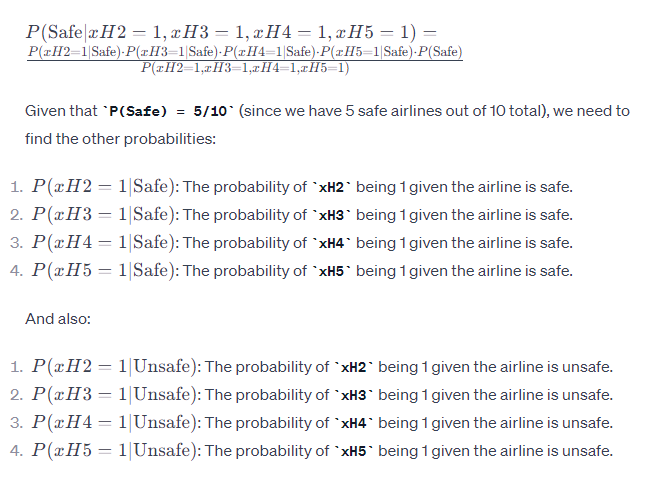
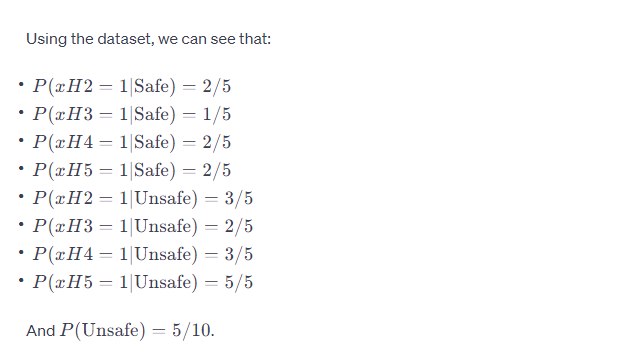

In [2]:
import numpy as np

# Given the binarized data
binarized_data = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # O1 Safe
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # O2 Unsafe
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],  # O3 Safe
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],  # O4 Safe
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # O5 Safe
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # O6 Unsafe
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],  # O7 Unsafe
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],  # O8 Unsafe
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],  # O9 Unsafe
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]   # O10 Safe
])

# Defining the prior probability of being safe as 0.5 (5 out of 10 are safe)
P_safe = 0.5

# Defining the class labels
class_labels = np.array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1])  # 1 for Safe, 0 for Unsafe

# Calculating the probabilities for the Naive Bayes classifier
# Probability of xH2 = 1 given Safe
P_xH2_given_safe = np.mean(binarized_data[class_labels == 1, 3])
# Probability of xH3 = 1 given Safe
P_xH3_given_safe = np.mean(binarized_data[class_labels == 1, 5])
# Probability of xH4 = 1 given Safe
P_xH4_given_safe = np.mean(binarized_data[class_labels == 1, 7])
# Probability of xH5 = 1 given Safe
P_xH5_given_safe = np.mean(binarized_data[class_labels == 1, 9])

# Probability of xH2 = 1 given Unsafe
P_xH2_given_unsafe = np.mean(binarized_data[class_labels == 0, 3])
# Probability of xH3 = 1 given Unsafe
P_xH3_given_unsafe = np.mean(binarized_data[class_labels == 0, 5])
# Probability of xH4 = 1 given Unsafe
P_xH4_given_unsafe = np.mean(binarized_data[class_labels == 0, 7])
# Probability of xH5 = 1 given Unsafe
P_xH5_given_unsafe = np.mean(binarized_data[class_labels == 0, 9])

# Calculate the likelihood for Safe
likelihood_safe = P_xH2_given_safe * P_xH3_given_safe * P_xH4_given_safe * P_xH5_given_safe

# Calculate the likelihood for Unsafe
likelihood_unsafe = P_xH2_given_unsafe * P_xH3_given_unsafe * P_xH4_given_unsafe * P_xH5_given_unsafe

# Calculate the evidence (the denominator in Bayes' theorem)
evidence = likelihood_safe * P_safe + likelihood_unsafe * (1 - P_safe)

# Finally, calculate the probability of being safe given the features
P_safe_given_features = (likelihood_safe * P_safe) / evidence

P_safe_given_features


0.08163265306122452

## ROC-AUC curve plot for binary data

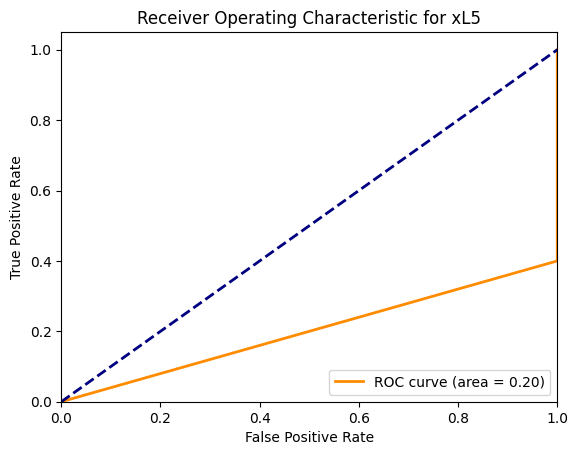

Threshold: inf, TPR: 0.0, FPR: 0.0
Threshold: 1.0, TPR: 0.4, FPR: 1.0
Threshold: 0.0, TPR: 1.0, FPR: 1.0


In [38]:
# Re-import necessary packages and redefine the data after the environment reset
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Given binarized data and class labels (safe=1, unsafe=0)
binarized_data = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # O1 Safe
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # O2 Unsafe
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],  # O3 Safe
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],  # O4 Safe
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # O5 Safe
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # O6 Unsafe
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],  # O7 Unsafe
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],  # O8 Unsafe
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],  # O9 Unsafe
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]   # O10 Safe
])
class_labels = np.array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1])  # 1 for Safe, 0 for Unsafe

# Extract the feature xL5 which is the 9th column in the data (index 8)
xL5 = binarized_data[:, 8]

# Calculate true positive rate (TPR) and false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(class_labels, 1 - xL5)  # 1 - xL5 because we consider xL5 for safe (positive class)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for xL5')
plt.legend(loc="lower right")
plt.show()

# Display the TPR and FPR at each threshold
for i, thres in enumerate(thresholds):
    print(f"Threshold: {thres}, TPR: {tpr[i]}, FPR: {fpr[i]}")


## ADA Boost - Linear Regression - See Q23 Solution
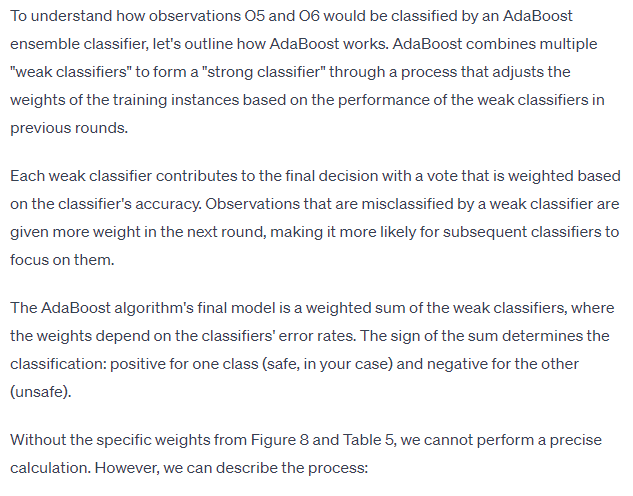
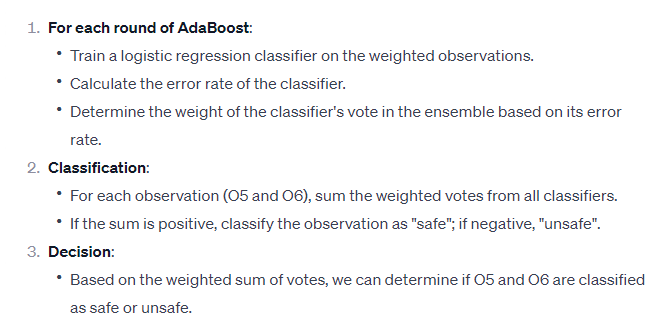
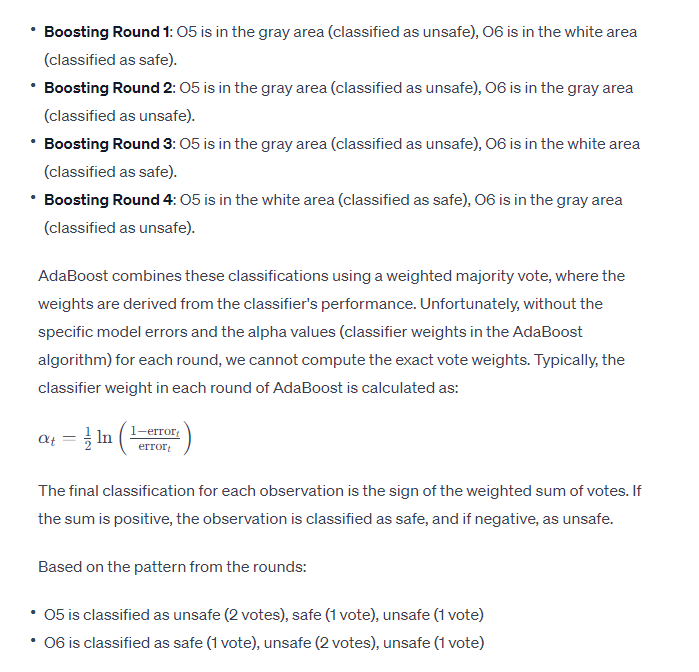
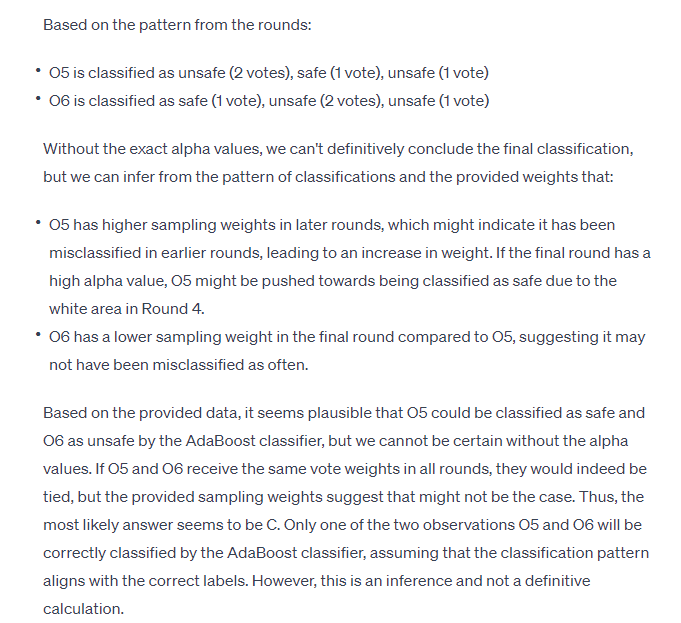

In [43]:
# Redefine the weights for each observation in each round
weights_rounds = {
    'O1': [0.1000, 0.0714, 0.0469, 0.0319],
    'O2': [0.1000, 0.0714, 0.0469, 0.0319],
    'O3': [0.1000, 0.1667, 0.1094, 0.2059],
    'O4': [0.1000, 0.0714, 0.0469, 0.0319],
    'O5': [0.1000, 0.1667, 0.1094, 0.2059],
    'O6': [0.1000, 0.0714, 0.0469, 0.0882],
    'O7': [0.1000, 0.0714, 0.0469, 0.0319],
    'O8': [0.1000, 0.1667, 0.3500, 0.2383],
    'O9': [0.1000, 0.0714, 0.1500, 0.1021],
    'O10': [0.1000, 0.0714, 0.0469, 0.0319]
}

# Misclassified observations for each round
misclassified_rounds = {
    1: ['O3', 'O5', 'O8'],
    2: ['O8', 'O9'],
    3: ['O3', 'O5', 'O6'],
    4: ['O3', 'O6']
}

# Calculate the error e(t) for each round and the corresponding alpha values
e_t_values = {}
alpha_values = {}

for round in misclassified_rounds:
    # Calculate the error rate for this round
    e_t = sum(weights_rounds[obs][round - 1] for obs in misclassified_rounds[round])
    e_t_values[round] = e_t
    # Calculate the alpha value for this round
    alpha_t = 0.5 * np.log((1 - e_t) / e_t)
    alpha_values[round] = alpha_t

# Compute the final weighted votes for O5 and O6
# final_votes = {'O5': 0, 'O6': 0}

# for obs in final_votes:
#     for round in alpha_values:
#         # If the observation was misclassified, it contributes negatively
#         # If it was correctly classified, it contributes positively
#         final_votes[obs] += (-alpha_values[round] if obs in misclassified_rounds[round] else alpha_values[round])

# # Determine the final classification based on the sign of the weighted sum
# final_classification = {obs: 'Safe' if final_votes[obs] > 0 else 'Unsafe' for obs in final_votes}

e_t_values, alpha_values


({1: 0.30000000000000004,
  2: 0.23809999999999998,
  3: 0.2657,
  4: 0.29410000000000003},
 {1: 0.4236489301936017,
  2: 0.5815622799930735,
  3: 0.5082749058458984,
  4: 0.4377768694207385})

## K-Means on data array with initial cluster centers

In [46]:
from sklearn.cluster import KMeans
import numpy as np

# Given dataset
X = np.array([1.0, 1.2, 1.5, 2.0, 2.2, 2.5, 3.0, 3.2]).reshape(-1, 1)

# Number of clusters
k = 3

# Initial cluster centers
init_centers = np.array([1.0, 1.2, 1.5]).reshape(-1, 1)

# Run k-means with specified initial centers
kmeans = KMeans(n_clusters=k, init=init_centers, n_init=1, random_state=0).fit(X)

# The converged cluster centers
converged_centers = kmeans.cluster_centers_

# The clustering of the eight observations
clusters = kmeans.labels_

converged_centers, clusters

#Clusters gives out indices position for final cluster grouped


(array([[1.  ],
        [1.35],
        [2.58]]),
 array([0, 1, 1, 2, 2, 2, 2, 2]))